In [6]:
from dotenv import load_dotenv
import requests
import os

import pandas as pd

load_dotenv()

api_key=os.getenv("ALPHA_API_KEY")

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
#url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey={api_key}'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={api_key}'
respons = requests.get(url)
data = respons.json()

#print(data)

data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [7]:
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-03-19',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [9]:
data['Time Series (Daily)']

{'2024-03-19': {'1. open': '191.4900',
  '2. high': '193.5800',
  '3. low': '190.2800',
  '4. close': '193.3400',
  '5. volume': '5317341'},
 '2024-03-18': {'1. open': '191.7000',
  '2. high': '193.2300',
  '3. low': '190.3200',
  '4. close': '191.6900',
  '5. volume': '5410562'},
 '2024-03-15': {'1. open': '191.9900',
  '2. high': '193.0573',
  '3. low': '190.7000',
  '4. close': '191.0700',
  '5. volume': '8828184'},
 '2024-03-14': {'1. open': '196.9500',
  '2. high': '197.7480',
  '3. low': '192.1200',
  '4. close': '193.4300',
  '5. volume': '4102202'},
 '2024-03-13': {'1. open': '197.5500',
  '2. high': '198.1000',
  '3. low': '195.3200',
  '4. close': '196.7000',
  '5. volume': '3960737'},
 '2024-03-12': {'1. open': '192.4600',
  '2. high': '199.1800',
  '3. low': '192.1500',
  '4. close': '197.7800',
  '5. volume': '5862512'},
 '2024-03-11': {'1. open': '195.0900',
  '2. high': '195.3800',
  '3. low': '190.8800',
  '4. close': '191.7300',
  '5. volume': '4712688'},
 '2024-03-08'

In [11]:
pd.DataFrame(data['Time Series (Daily)']).transpose()

,1. open,2. high,3. low,4. close,5. volume
2024-03-19,191.4900,193.5800,190.2800,193.3400,5317341
2024-03-18,191.7000,193.2300,190.3200,191.6900,5410562
2024-03-15,191.9900,193.0573,190.7000,191.0700,8828184
2024-03-14,196.9500,197.7480,192.1200,193.4300,4102202
2024-03-13,197.5500,198.1000,195.3200,196.7000,3960737
...,...,...,...,...,...
2023-10-31,143.0000,144.7600,142.5900,144.6400,6592041
2023-10-30,143.1900,144.5000,142.5800,142.6300,4204190
2023-10-27,143.6200,144.7000,141.7100,142.5200,5469227
2023-10-26,142.2000,144.4100,141.5800,143.7600,11130170


In [12]:
# general loop for several stocks

symbols=['AAPL','NVDA','TSLA','IBM']

stock_list=[]

for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    data= requests.get(url).json()
    df=pd.DataFrame(data['Time Series (Daily)']).transpose()
    series=df['4. close'].rename(symbol).astype(float)
    stock_list.append(series)

In [13]:
stock_list

[2024-03-19    176.08
 2024-03-18    173.72
 2024-03-15    172.62
 2024-03-14    173.00
 2024-03-13    171.13
                ...  
 2023-10-31    170.77
 2023-10-30    170.29
 2023-10-27    168.22
 2023-10-26    166.89
 2023-10-25    171.10
 Name: AAPL, Length: 100, dtype: float64,
 2024-03-19    893.980
 2024-03-18    884.550
 2024-03-15    878.365
 2024-03-14    879.440
 2024-03-13    908.880
                ...   
 2023-10-31    407.800
 2023-10-30    411.610
 2023-10-27    405.000
 2023-10-26    403.260
 2023-10-25    417.790
 Name: NVDA, Length: 100, dtype: float64,
 2024-03-19    171.32
 2024-03-18    173.80
 2024-03-15    163.57
 2024-03-14    162.50
 2024-03-13    169.48
                ...  
 2023-10-31    200.84
 2023-10-30    197.36
 2023-10-27    207.30
 2023-10-26    205.76
 2023-10-25    212.42
 Name: TSLA, Length: 100, dtype: float64,
 2024-03-19    193.34
 2024-03-18    191.69
 2024-03-15    191.07
 2024-03-14    193.43
 2024-03-13    196.70
                ...  
 2023

In [15]:
stocks=pd.concat(stock_list,axis=1)

In [16]:
import plotly_express as px

px.line(stocks, x=stocks.index, y=stocks.columns)

In [17]:
stocks.index=pd.to_datetime(stocks.index)

In [19]:
stocks.loc['2023-11']

,AAPL,NVDA,TSLA,IBM
2023-11-30,189.95,467.70,240.08,158.56
2023-11-29,189.37,481.40,244.14,156.41
2023-11-28,190.40,478.21,246.72,155.65
2023-11-27,189.79,482.42,236.08,155.57
2023-11-24,189.97,477.76,235.45,155.18
2023-11-22,191.31,487.16,234.21,155.13
2023-11-21,190.64,499.44,241.20,153.91
2023-11-20,191.45,504.09,235.60,154.35
2023-11-17,189.69,492.98,234.30,152.89
2023-11-16,189.71,494.80,233.59,153.06


In [20]:
stocks.sort_index().loc["2024-02-15":"2024-03"]

,AAPL,NVDA,TSLA,IBM
2024-02-15,183.86,726.580,200.45,186.87
2024-02-16,182.31,726.130,199.95,187.64
2024-02-20,181.56,694.520,193.76,183.44
2024-02-21,182.32,674.720,194.77,179.70
2024-02-22,184.37,785.380,197.41,184.21
2024-02-23,182.52,788.170,191.97,185.72
2024-02-26,181.16,790.920,199.40,184.13
2024-02-27,182.63,787.010,199.73,184.87
2024-02-28,181.42,776.630,202.04,185.30
2024-02-29,180.75,791.120,201.88,185.03


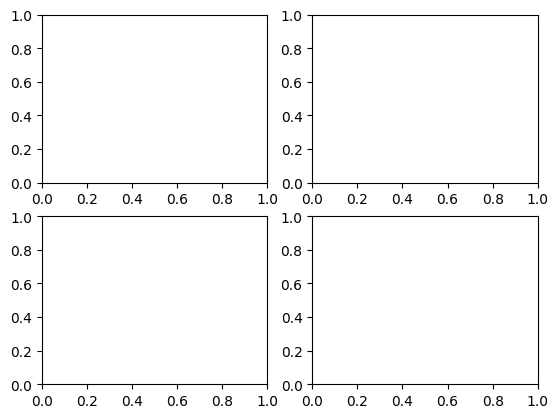

In [23]:
# plot as sublots

import seaborn as sns
import matplotlib.pyplot as plt

fix, axes = plt.subplots(2,2)


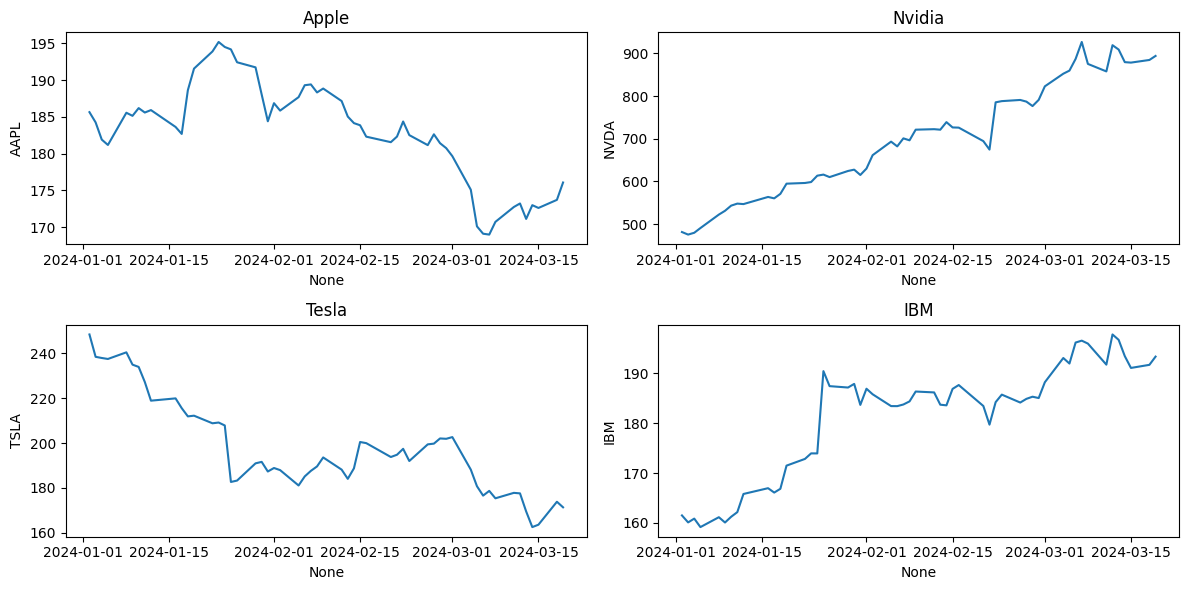

In [30]:

fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

stock_names={'AAPL':'Apple', 'NVDA':'Nvidia', 'TSLA':'Tesla', 'IBM':'IBM'}

for ax,symbol  in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks.loc["2024"], x=stocks.loc["2024"].index, y=symbol, ax=ax)
    ax.set(title=f"{stock_names[symbol]}")

fig.tight_layout()

plt.show()